In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
data= pd.read_csv(r'card_transdata_Dataset.csv')

### EDA

Shape of the dataset

In [6]:
data.shape  

(1000000, 8)

displaying top 5 rows

In [7]:
data.head() #displaying top 5 rows

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [8]:
data.tail() #displaying last 5 rows

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


Checking the types of data

In [9]:
data.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

counting data types

In [10]:
data.dtypes.value_counts()  # counting data types

float64    8
dtype: int64

Checking if data has any duplicate rows[will drop duplicate if any]

In [11]:
duplicate_rows_df = data[data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape) ## Checking if data has any duplicate rows[will drop duplicate if any]

Number of duplicate rows:  (0, 8)


Checking if data has missing or null values[To analyze, missing count and replace missing values]

In [12]:
print(data.isna().sum())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


checking the unique values present in dataset features

In [13]:
## checking the unique values present in dataset features
print(f" Total number of unique items in distance_from_home feature: {data.distance_from_home.nunique()} \n Total number of unique items in distance_from_last_transaction feature: {data.distance_from_last_transaction.nunique()} \n Total number of unique items in ratio_to_median_purchase_price feature: {data.ratio_to_median_purchase_price.nunique()} \n Total number of unique items in repeat_retailer feature: {data.repeat_retailer.nunique()} \n Total number of unique items in used_chip feature: {data.used_chip.nunique()} \n Total number of unique items in used_pin_number feature: {data.used_pin_number.nunique()}")

 Total number of unique items in distance_from_home feature: 1000000 
 Total number of unique items in distance_from_last_transaction feature: 1000000 
 Total number of unique items in ratio_to_median_purchase_price feature: 1000000 
 Total number of unique items in repeat_retailer feature: 2 
 Total number of unique items in used_chip feature: 2 
 Total number of unique items in used_pin_number feature: 2


Summary Statistics

In [14]:
## Summary Statistics
""" 
An overall view of the metrics in our data.
that includes the count of observations, 
The mean of observations, the standard deviation, min, 
25% quartile, 50% quartile, 75% quartile, 
and the max value in each Series.
"""
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Ratio of fraud/not fraud disribution:

Ratio of fraud/not fraud disribution: 
0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64 



(array([912597.,  87403.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

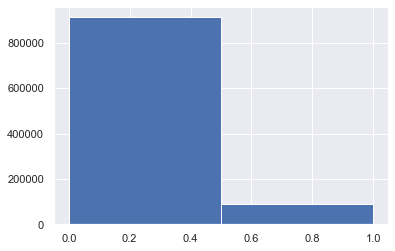

In [15]:
print (f"Ratio of fraud/not fraud disribution: \n{data.fraud.value_counts(normalize=True)} \n" )
plt.hist(data["fraud"], bins=2)  # Traget variable distrubution using histogram

In [16]:
### Histogram & Jointplot Generation
"""
Distribution plots are used to visualize univariate distributions of observations
They can be used to identify outliers, identify how normal a dataset is, 
and whether there are potential gaps in your dataset, along with other applications.
"""
# f, axes = plt.subplots(2, 2, figsize=(20, 6), sharex=True)
# # sns.distplot(data['distance_from_home'],ax=axes[0])
# sns.distplot(data['ratio_to_median_purchase_price'],ax=axes[1])

# plt.show()

'\nDistribution plots are used to visualize univariate distributions of observations\nThey can be used to identify outliers, identify how normal a dataset is, \nand whether there are potential gaps in your dataset, along with other applications.\n'

Correlations Heat Maps

<AxesSubplot:>

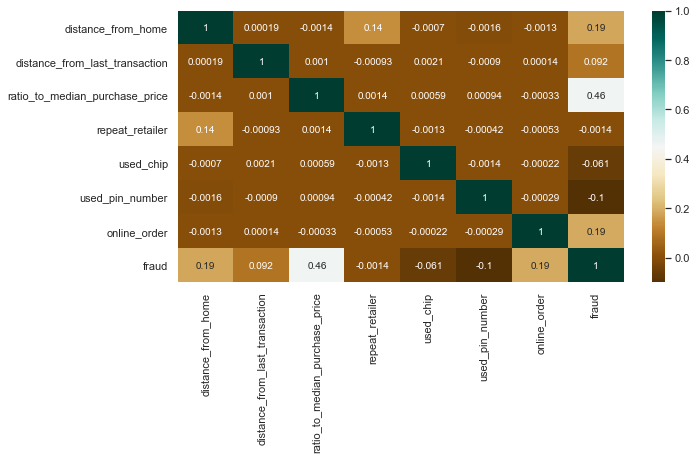

In [17]:
### Correlations Heat Maps
"""
Here we find the correlation between data and target (to identify more important features).
"""

plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

Here we see "ratio_to_median_purchase_price" has high strong  positive relationship with "fraud"(Target variable.)

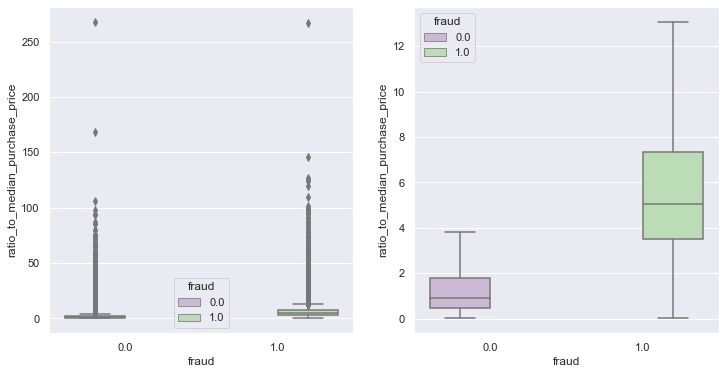

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="fraud", y="ratio_to_median_purchase_price", hue="fraud",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="fraud", y="ratio_to_median_purchase_price", hue="fraud",data=data, palette="PRGn",showfliers=False)
plt.show()

In [19]:
# tmp = data[['ratio_to_median_purchase_price','fraud']].copy()
class_0 = data[['ratio_to_median_purchase_price','fraud']].loc[data['fraud'] == 0]['ratio_to_median_purchase_price']
class_1 = data[['ratio_to_median_purchase_price','fraud']].loc[data['fraud'] == 1]['ratio_to_median_purchase_price']
class_0.describe()

count    912597.000000
mean          1.423642
std           1.946152
min           0.004399
25%           0.449768
50%           0.913950
75%           1.788918
max         267.802942
Name: ratio_to_median_purchase_price, dtype: float64

In [20]:
class_1.describe()

count    87403.000000
mean         6.006323
std          5.564320
min          0.011966
25%          3.500270
50%          5.071294
75%          7.331222
max        266.689692
Name: ratio_to_median_purchase_price, dtype: float64

Here, we see Actual transection(class 0) smaller Q1, Q3 when comparinng fraudulent transactions(class 1).
Thus we say, whenever our ratio_to_median_purchase_price value is high, then high chances of that transection to be fraud.

Removing any Feature having correlation greater then 0.75(if any)

In [21]:
# 
m = ~(c.mask(np.eye(len(c), dtype=bool)).abs() > 0.75).any()

In [22]:
data.columns[list(m)]

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

Checking the data distribution of the features.

C:\Users\tomer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tomer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tomer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

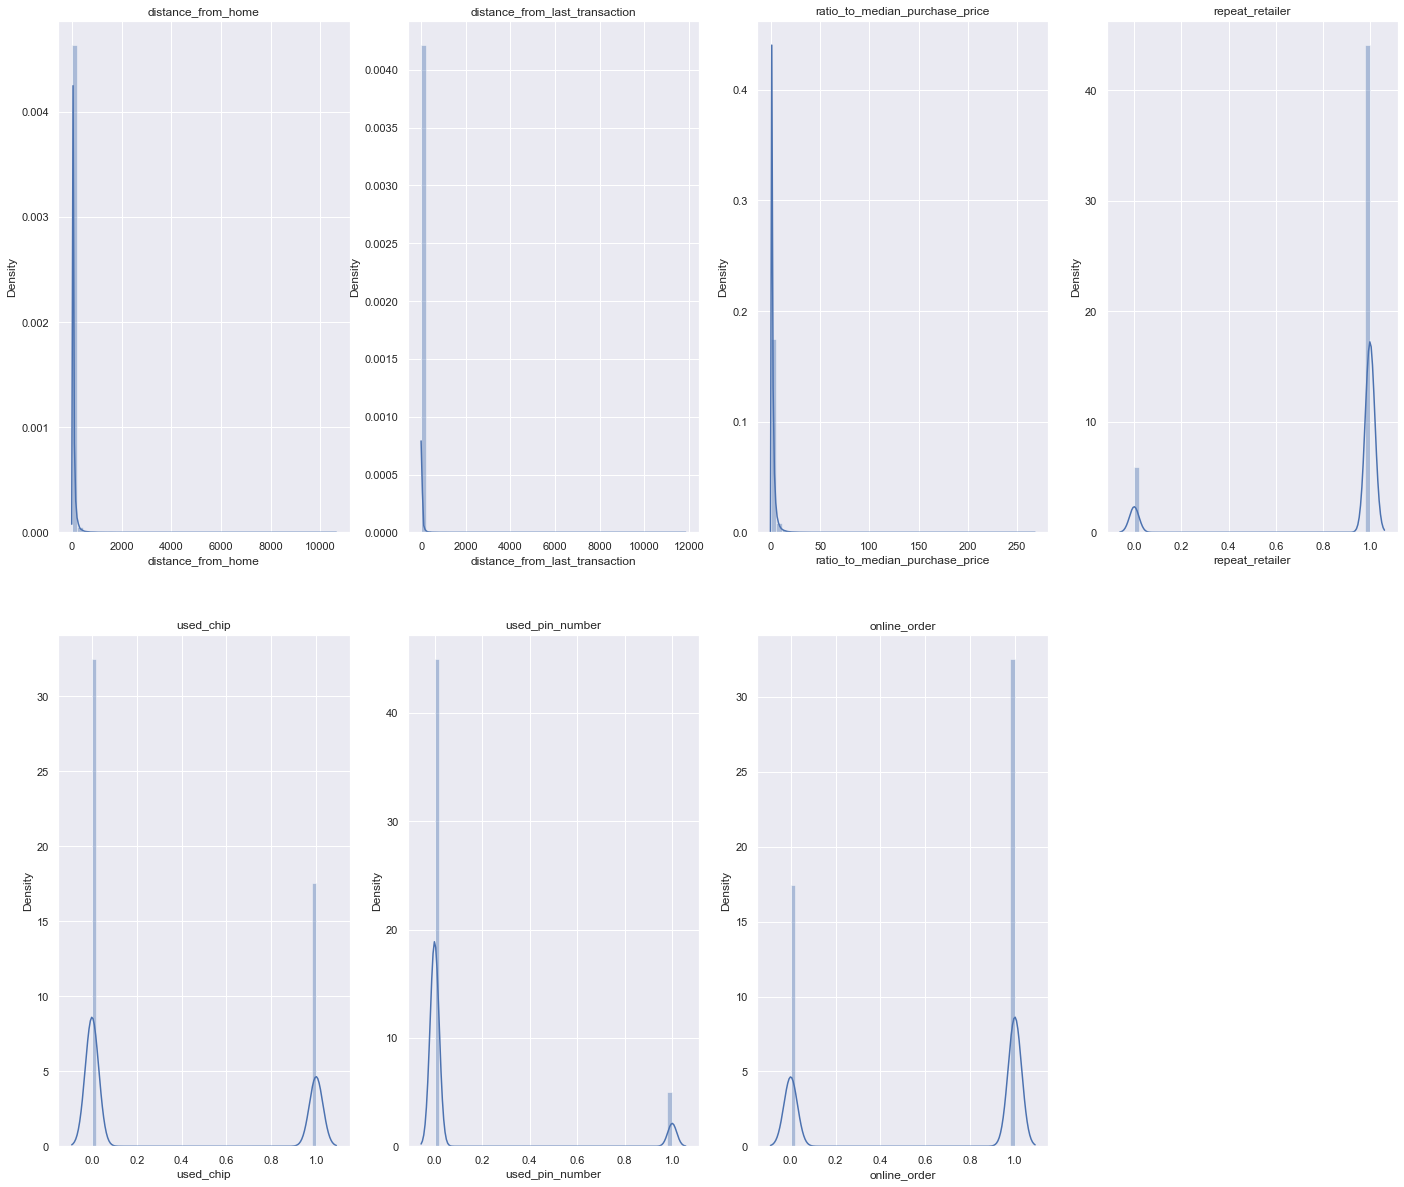

In [23]:
"""
Checking the data distribution of the features.
1: Distplot
"""
features = data.columns.tolist()
f, ax = plt.subplots(figsize=(24, 32))
for i in range(len(features) - 1):
    plt.subplot(3, 4, i + 1)
    plt.title(data.columns.tolist()[i])
    sns.distplot(data[features[i]])

Most of distributions look Gaussian in above analysis, 
More interestengly, In case of fraud transection, 'Online_order and repeat_retailer' density is high.

Checking the data distribution of the features.(BoxPlot)

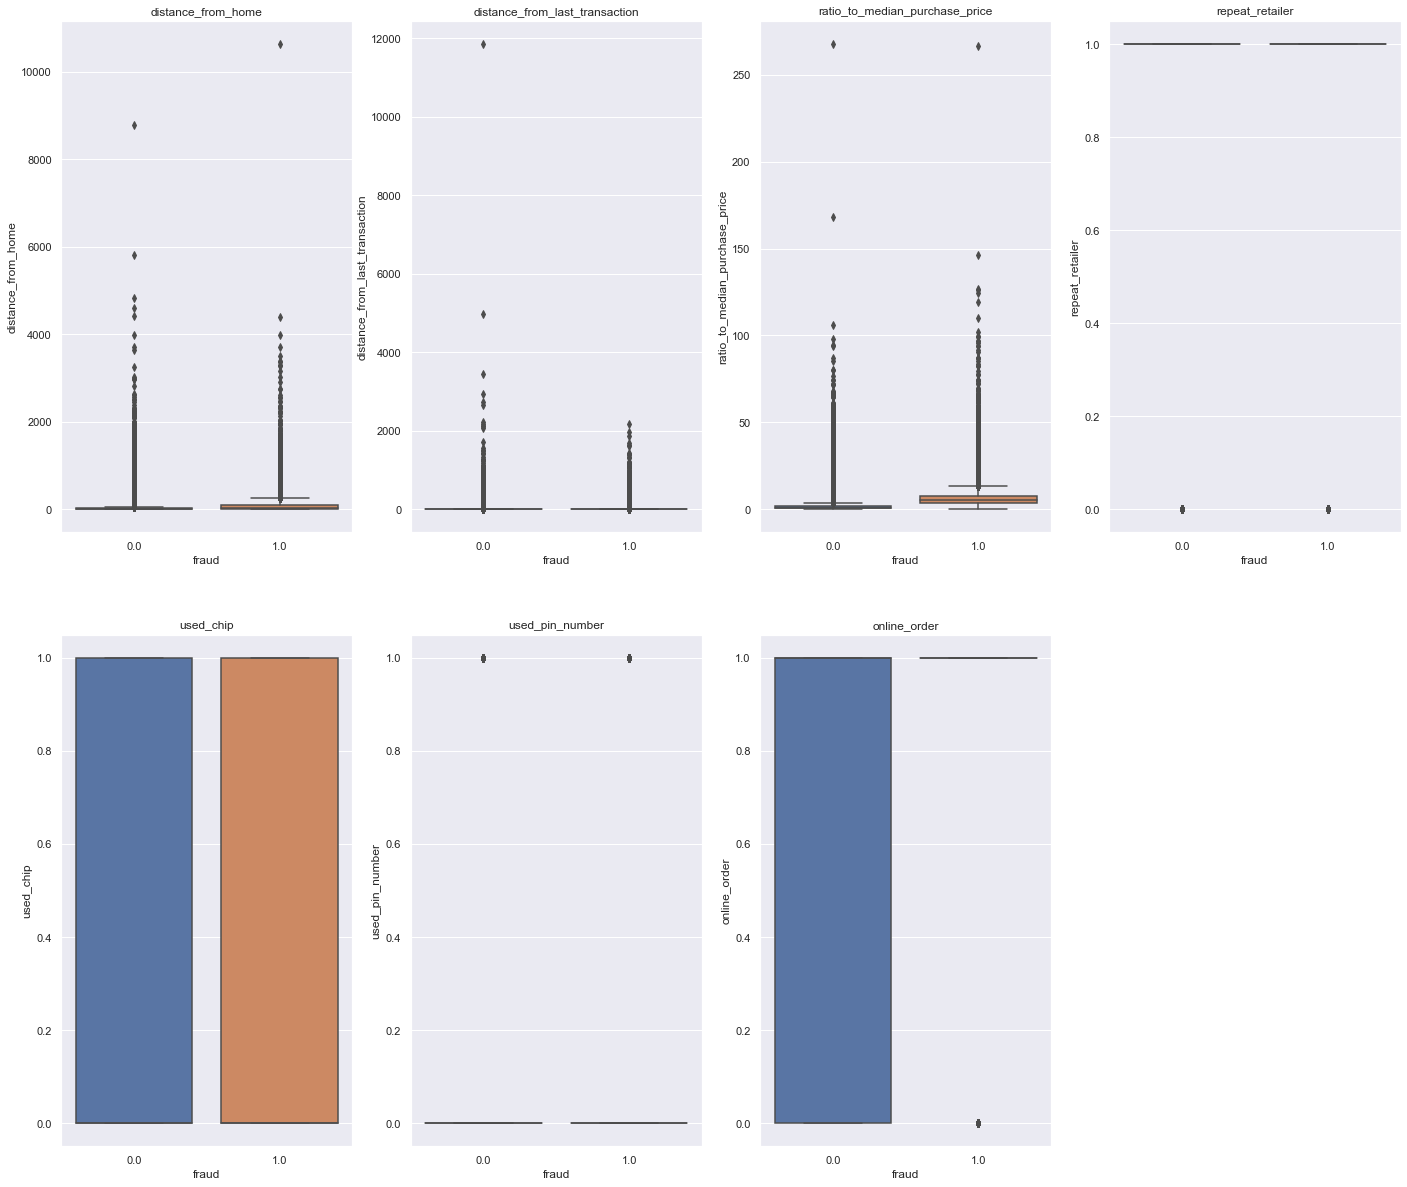

In [24]:
"""
Checking the data distribution of the features.
2: Boxplot
"""

features = data.columns.tolist()
f, ax = plt.subplots(figsize=(24, 32))
for i in range(len(features) - 1):
    plt.subplot(3, 4, i + 1)
    plt.title(data.columns.tolist()[i])
    sns.boxplot(x='fraud', y=features[i], data=data)
    # sns.distplot(data[features[i]])

In [25]:
"""
From above boxes, we see most of the values are either above or below the boxes, Lets calculate IQR
"""
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

data_ = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

print (f'\nif we consider all points above and below IQR our data shape would be {data_.shape}')

'''
But our IQR hypothesis fails in our case, 
we can't drop observations above or below specially distance and purchase_price features in case of anomaly detection model.
'''

distance_from_home                21.865977
distance_from_last_transaction     3.059077
ratio_to_median_purchase_price     1.620697
repeat_retailer                    0.000000
used_chip                          1.000000
used_pin_number                    0.000000
online_order                       1.000000
fraud                              0.000000
dtype: float64

if we consider all points above and below IQR our data shape would be (553489, 8)


"\nBut our IQR hypothesis fails in our case, \nwe can't drop observations above or below specially distance and purchase_price features in case of anomaly detection model.\n"

### Analyzing the difference between fraud and non_fraud transections

In [26]:
#spliting data into fraud and non fraud dataset
fraud = data[data.fraud ==1]     
non_fraud= data[data.fraud ==0]

1: distance_from_home

C:\Users\tomer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tomer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histogram of distance_from_home for fraudulent samples'}, xlabel='distance_from_home', ylabel='Density'>

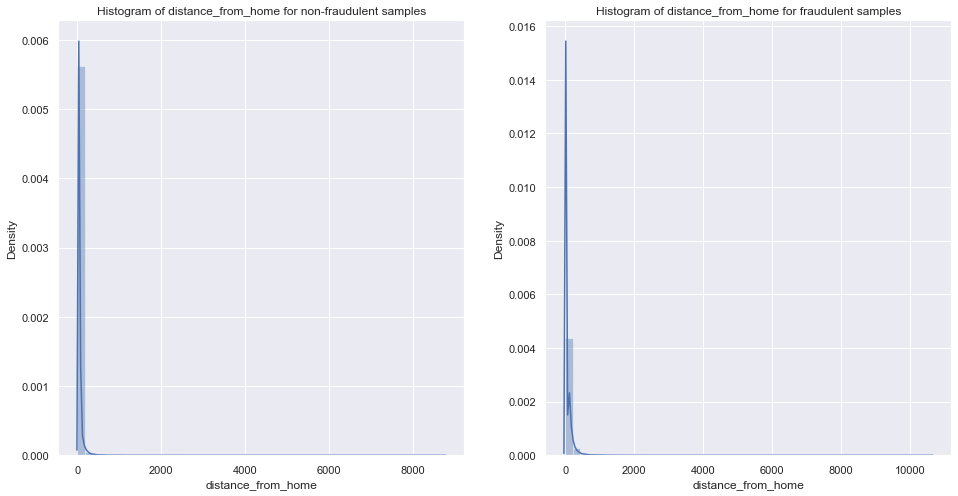

In [27]:
## 1: distance_from_home 

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title('Histogram of distance_from_home for non-fraudulent samples')
sns.distplot(non_fraud["distance_from_home"])
plt.subplot(1, 2, 2)
plt.title('Histogram of distance_from_home for fraudulent samples')
sns.distplot(fraud["distance_from_home"])

2: distance_from_last_transaction

C:\Users\tomer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tomer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histogram of distance_from_last_transaction for fraudulent samples'}, xlabel='distance_from_last_transaction', ylabel='Density'>

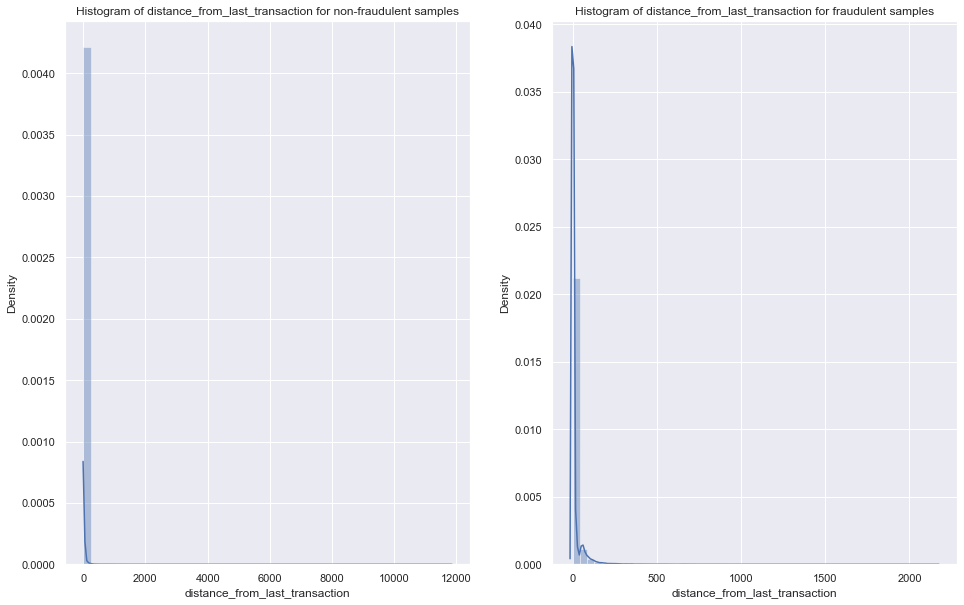

In [28]:
### distance_from_last_transaction

plt.figure(figsize=(16,10))
plt.subplot(1, 2, 1)
plt.title('Histogram of distance_from_last_transaction for non-fraudulent samples')
sns.distplot(non_fraud["distance_from_last_transaction"])
plt.subplot(1, 2, 2)
plt.title('Histogram of distance_from_last_transaction for fraudulent samples')
sns.distplot(fraud["distance_from_last_transaction"])

Observations:
- Distribution of distance_from_last_transaction of transactions for fraud samples has a short tail. 
- Fraud transactions, on average, are smaller than non-fraud ones[may be coz of less observation points(rows)], but for having a  short
    tail we can say distance is an important feature.(if distance_from_last_transaction is high then it is more likely to be a fraud transaction.)

3: ratio_to_median_purchase_price

C:\Users\tomer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tomer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histogram of ratio_to_median_purchase_price for fraudulent samples'}, xlabel='ratio_to_median_purchase_price', ylabel='Density'>

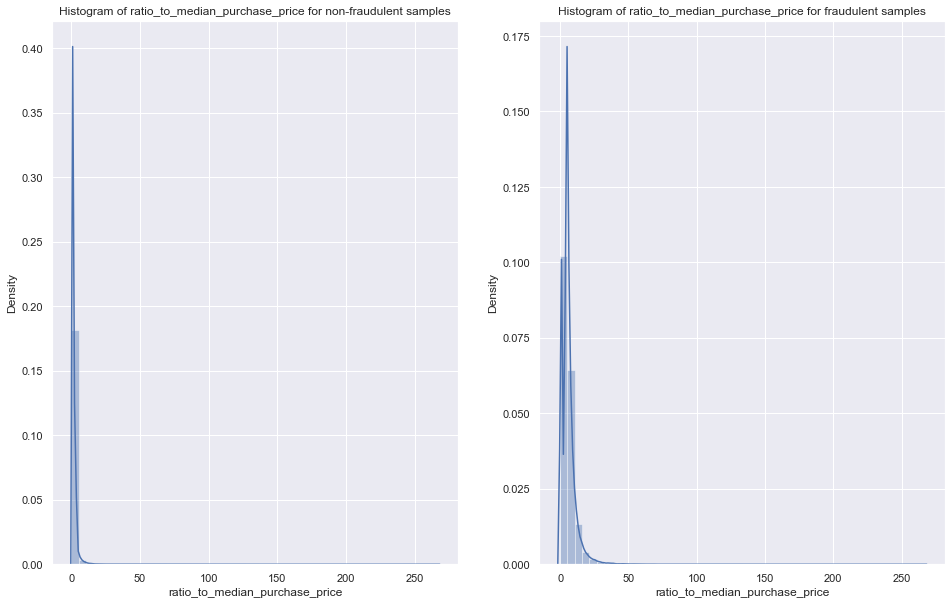

In [29]:
### ratio_to_median_purchase_price

plt.figure(figsize=(16,10))
plt.subplot(1, 2, 1)
plt.title('Histogram of ratio_to_median_purchase_price for non-fraudulent samples')
sns.distplot(non_fraud["ratio_to_median_purchase_price"])
plt.subplot(1, 2, 2)
plt.title('Histogram of ratio_to_median_purchase_price for fraudulent samples')
sns.distplot(fraud["ratio_to_median_purchase_price"])

Observations:
- Distribution of ratio_to_median_purchase_price of transactions for fraud samples has a tail. 
- Fraudulent transactions, on average are larger than non-fraudulent ones, so purchase price is an important feature!

Our data features are less, we might not need to PCA or other Dimensionality reduction technique.
   Still, Lets have a look of dimensionality reduction results, 
   this gives us an idea of how separable the data is, and, if it embedding into a lower dimenison helps?.

In [30]:
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import PCA, KernelPCA, FastICA

In [31]:
features = data.loc[:,data.columns != 'fraud'] 
labels = data['fraud']

1: PCA

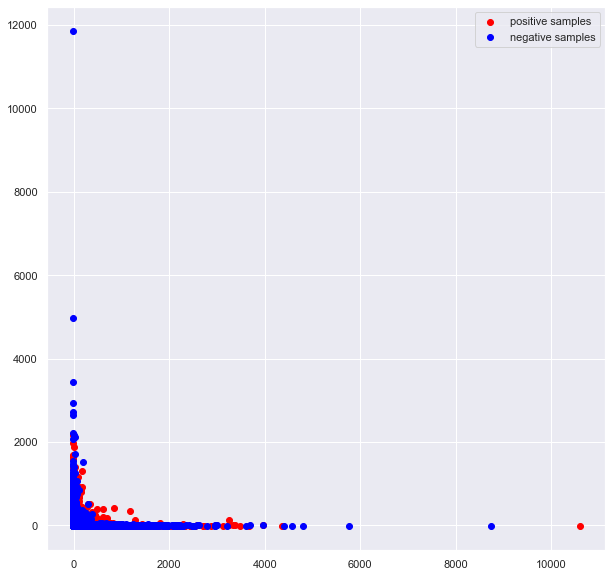

In [32]:
#1: PCA
pca_embedding =  PCA(n_components=2) 
pca_emb_data = pca_embedding.fit_transform(features.values)
plt.figure(figsize=(10,10))
plt.scatter(pca_emb_data[labels == 1, 0], pca_emb_data[labels == 1, 1], color='red', label='positive samples')
plt.scatter(pca_emb_data[labels == 0, 0], pca_emb_data[labels == 0, 1], color='blue', label='negative samples')
plt.legend()

2: FastICA

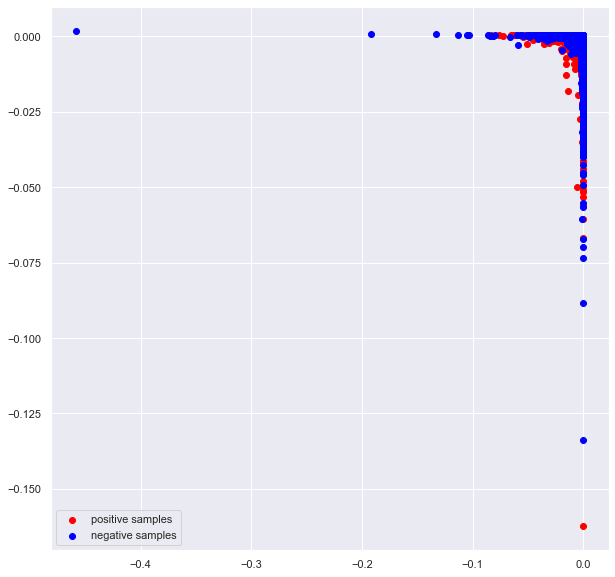

In [33]:
#2: FastICA
ica_embedding =  FastICA(n_components=2) 
ica_emb_data = ica_embedding.fit_transform(features.values)
plt.figure(figsize=(10,10))
plt.scatter(ica_emb_data[labels == 1, 0], ica_emb_data[labels == 1, 1], color='red', label='positive samples')
plt.scatter(ica_emb_data[labels == 0, 0], ica_emb_data[labels == 0, 1], color='blue', label='negative samples')
plt.legend()

This is just a rotation of the results with PCA so we can ignor ICA, and it 
looks like just applying PCA do not separate it linearnly.

Conclusions:
The dimension of the feature space is not very large.
There are no missing entries, constant or duplicate features, this is a clean data set!
Dynamic range of features is a good feature itself to be added to existing ones
Outlier data detection and removal may need to be carried out (not in the first version of the model we build though)
Data visualisation in 2D space shows that these features can not be separated.

### Building Model

In [34]:
# get the columns from the dataframe
columns = data.columns.tolist()

# filter the columns to remove the data we do not want
columns = [c for c in columns if c not in ['fraud']]

# store the variable we will be predicting on which is class
target = 'fraud'

# X includes everything except our class column
X = data[columns]
# Y includes all the class labels for each sample
# this is also one-dimensional
Y = data[target]

# print the shapes of X and Y
print(X.shape)
print(Y.shape)

(1000000, 7)
(1000000,)


In [35]:
# determine the number of fraud cases
fraud = data[data['fraud'] == 1]
valid = data[data['fraud'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

0.09577392868922427
Fraud Cases: 87403
Valid Cases: 912597


#1: Model: Using IsolationForest and LocalOutlierFactor Model

In [38]:
mod_out_is_lo = {}
state = 1
# define the outlier detection methods
classifiers = {
    # contamination is the number of outliers we think there are
    'Isolation Forest': IsolationForest(max_samples = len(X),contamination = outlier_fraction,random_state = state),
    # number of neighbors to consider, the higher the percentage of outliers the higher you want to make this number
    'Local Outlier Factor': LocalOutlierFactor(n_neighbors = 20,contamination = outlier_fraction)}
n_outliers = len(fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
# reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    # calculate the number of errors
    n_errors = (y_pred != Y).sum()
    # classification matrix
    print (f'Model performance with {clf_name}')
    print('{}: {}'.format(clf_name, n_errors))
    print("accuracy_score: ",accuracy_score(Y, y_pred))
    print (f'confusion_matrix: {confusion_matrix(Y, y_pred)}')
    print(f'classification_report {classification_report(Y, y_pred)}')
    print (f'roc_auc_score: {roc_auc_score(Y, y_pred)}')
    tn, fp, fn, tp = confusion_matrix(Y, y_pred).ravel()
    specificity = tn / (tn+fp)
    print (f'specificity: {specificity}')
    model_score= [accuracy_score(Y, y_pred),roc_auc_score(Y, y_pred),specificity]

    mod_out_is_lo[clf_name] = model_score
    
    # score.append(mod_out_is_lo)

C:\Users\tomer\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\tomer\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Model performance with Isolation Forest
Isolation Forest: 147975
accuracy_score:  0.852025
confusion_matrix: [[834424  78173]
 [ 69802  17601]]
classification_report               precision    recall  f1-score   support

         0.0       0.92      0.91      0.92    912597
         1.0       0.18      0.20      0.19     87403

    accuracy                           0.85   1000000
   macro avg       0.55      0.56      0.56   1000000
weighted avg       0.86      0.85      0.86   1000000

roc_auc_score: 0.5578587958798741
specificity: 0.9143400646725772
Model performance with Local Outlier Factor
Local Outlier Factor: 155555
accuracy_score:  0.844445
confusion_matrix: [[830634  81963]
 [ 73592  13811]]
classification_report               precision    recall  f1-score   support

         0.0       0.92      0.91      0.91    912597
         1.0       0.14      0.16      0.15     87403

    accuracy                           0.84   1000000
   macro avg       0.53      0.53      0.53   100

In [39]:
# model_score= [accuracy_score(Y, y_pred),roc_auc_score(Y, y_pred),specificity]

# mod_out_is_lo[clf_name] = model_score
mod_out_is_lo

{'Isolation Forest': [0.852025, 0.5578587958798741, 0.9143400646725772],
 'Local Outlier Factor': [0.844445, 0.534101126293406, 0.9101870814828451]}

#2: Model: Using Random Forest Classifier

In [40]:
X = data.iloc[:,data.columns != 'fraud']
Y = data['fraud']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=0, shuffle=True )
# len(train_x), len(test_x), len(train_y), len(test_y)

In [41]:
x_train.shape , x_test.shape , y_train.shape, y_test.shape

((700000, 7), (300000, 7), (700000,), (300000,))

In [42]:
clf_name= 'RandomForestClassifier'
clf = RandomForestClassifier(n_jobs=-1,random_state=0,criterion='gini',n_estimators=100,verbose=False)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0,
                       verbose=False, warm_start=False)

In [43]:
# Accuracy_score,Area under curve,confusion_matrix, classification_report, roc_auc_score, specificity calculations
preds = clf.predict(x_test)

print (f'Model performance with {clf_name}')
print('{}: {}'.format(clf_name, n_errors))
print("accuracy_score: ",accuracy_score(y_test.values, preds))
print (f'confusion_matrix: {confusion_matrix(y_test.values, preds)}')
print(f'classification_report {classification_report(y_test.values, preds)}')
print (f'roc_auc_score: {roc_auc_score(y_test.values, preds)}')
tn, fp, fn, tp = confusion_matrix(y_test.values, preds).ravel()
specificity = tn / (tn+fp)
print (f'specificity: {specificity}')

model_score= [accuracy_score(y_test.values, preds),roc_auc_score(y_test.values, preds),specificity]
mod_out_is_lo[clf_name] = model_score

Model performance with RandomForestClassifier
RandomForestClassifier: 155555
accuracy_score:  0.9999933333333333
confusion_matrix: [[273907      0]
 [     2  26091]]
classification_report               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273907
         1.0       1.00      1.00      1.00     26093

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

roc_auc_score: 0.9999616755451654
specificity: 1.0


In [44]:
mod_out_is_lo

{'Isolation Forest': [0.852025, 0.5578587958798741, 0.9143400646725772],
 'Local Outlier Factor': [0.844445, 0.534101126293406, 0.9101870814828451],
 'RandomForestClassifier': [0.9999933333333333, 0.9999616755451654, 1.0]}

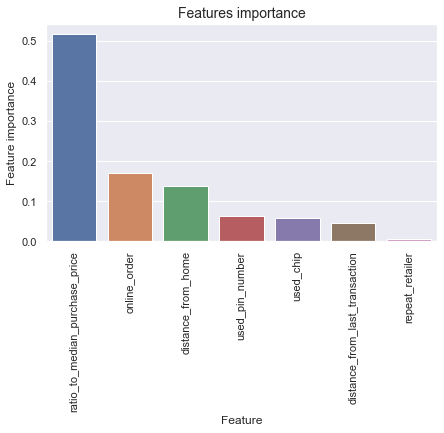

In [45]:
## Finding out most important features using Random Forest classifier
tmp = pd.DataFrame({'Feature': x_test.columns.tolist(), 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

##### The most important features are: ratio to median,online_order,distance from home etc

#### Modelling Results:

In [46]:
mod_out_is_lo
score_df= pd.DataFrame(mod_out_is_lo)
score_df= score_df.T
score_df.columns = ['accuracy_score','roc_auc_score','specificity']
score_df

,accuracy_score,roc_auc_score,specificity
Isolation Forest,0.852025,0.557859,0.914340
Local Outlier Factor,0.844445,0.534101,0.910187
RandomForestClassifier,0.999993,0.999962,1.000000


### Conclusions

1: We investigated the data, checking for data unbalancing, visualizing the features distribution and understanding the relationship between different features. Also cheking if We can further reduce the dimension.then We then investigated two predictive models. and also analyzed important features.   
2: We started with IsolationForest and LocalOutlierFactor Model for which we obtained an AUC scode of 0.5578 and 0.5341 respectively when predicting the target for the test set.

3: Then we analyzed RandomForrestClassifier result, for which we obtained an AUC scode of 0.99.  